## Three Stock Monte

Recently you received an annual bonus from your company of $15,000 for all of your hard work over the past year. Since you have no immediate vacations planned or bills to pay, you decide the best use of this new money is to invest it across a few stocks and let it grow. In order to decrease risk and maximize return, you want to invest your bonus into three stocks - AT&T (`T`), Nike (`NKE`), and Exxon Mobil (`XOM`). However, you are unsure how much of each stock to buy.

Your job is to use your API knowledge and the `MCForecastTools.py` toolkit to determine how much of each stock to purchase in order to maximize your chances of profit.

### Import Dependencies

In [1]:
# Import libraries and dependencies
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

### Load Environment Variables and Set Up Alpaca Environment

In [2]:
# Load .env enviroment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_API_SECRET_KEY")

print(f"Your alpaca key is {type(alpaca_key)}.")
print(f"Your alpaca secret key is {type(alpaca_secret_key)}.")

Your alpaca key is <class 'str'>.
Your alpaca secret key is <class 'str'>.


In [4]:
api = tradeapi.REST(alpaca_key, alpaca_secret_key, api_version='V2')

### Get Past 5 Year's Worth of Stock Price Data via Alpaca API Call

In [5]:
# Set timeframe to '1D'
timeframe = '1D'

# Set start and end datetimes between now and 5 years ago.
start_date = pd.Timestamp('2015-6-5', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-6-5', tz='America/New_York').isoformat()

# Set the ticker information
tickers = ['TSLA', 'GM']

# Get 5 year's worth of historical price data
stock_price_data_df = api.get_barset(tickers, timeframe=timeframe, start=start_date, end=end_date, limit=1000).df

# Display sample data
stock_price_data_df.head(10)

GM                                      TSLA  \
                            open   high     low    close    volume    open   
time                                                                         
2017-06-15 00:00:00-04:00  34.41  34.67  34.380  34.6200   8132151  372.50   
2017-06-16 00:00:00-04:00  34.59  34.60  33.925  34.2900  12211829  377.78   
2017-06-19 00:00:00-04:00  34.39  34.57  34.280  34.3500   8600877  375.00   
2017-06-20 00:00:00-04:00  34.34  34.52  34.150  34.3900   6542082  376.67   
2017-06-21 00:00:00-04:00  34.48  34.50  33.950  34.1300   7318720  374.35   
2017-06-22 00:00:00-04:00  34.05  34.34  33.860  34.2100   7696932  377.99   
2017-06-23 00:00:00-04:00  34.14  34.27  33.960  34.1850   7119587  382.45   
2017-06-26 00:00:00-04:00  34.29  34.65  34.180  34.5400   9707198  386.49   
2017-06-27 00:00:00-04:00  34.33  34.50  34.015  34.1922   9251729  376.40   
2017-06-28 00:00:00-04:00  34.57  34.75  34.460  34.5800  10003541  367.56   

                                                             
                             high      low   close   volume  
time                                                         
2017-06-15 00:00:00-04:00  375.46  366.490  375.34  8585072  
2017-06-16 00:00:00-04:00  378.01  370.100  371.40  4691654  
2017-06-19 00:00:00-04:00  376.70  367.800  369.80  5034089  
2017-06-20 00:00:00-04:00  378.88  369.730  372.24  5606828  
2017-06-21 00:00:00-04:00  376.99  368.020  376.40  3870166  
2017-06-22 00:00:00-04:00  385.00  373.570  382.61  6198923  
2017-06-23 00:00:00-04:00  386.99  379.345  383.23  4952152  
2017-06-26 00:00:00-04:00  386.95  373.100  377.47  5351853  
2017-06-27 00:00:00-04:00  376.40  362.020  362.36  5478243  
2017-06-28 00:00:00-04:00  371.74  362.520  371.01  5088420

### Simulate five year portfolio growth with evenly-distributed stock investments:

### Configure the Instance of `MCSimulation`

In [6]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns
weights = [0.5, 0.5]
trade_days = 252*5

MC_fiveryear = MCSimulation(portfolio_data=stock_price_data_df, weights=weights, num_simulation=500, num_trading_days=trade_days)

# Print the simulation input data
MC_fiveryear.portfolio_data.head(10)

GM                                    \
                            open   high     low    close    volume   
time                                                                 
2017-06-15 00:00:00-04:00  34.41  34.67  34.380  34.6200   8132151   
2017-06-16 00:00:00-04:00  34.59  34.60  33.925  34.2900  12211829   
2017-06-19 00:00:00-04:00  34.39  34.57  34.280  34.3500   8600877   
2017-06-20 00:00:00-04:00  34.34  34.52  34.150  34.3900   6542082   
2017-06-21 00:00:00-04:00  34.48  34.50  33.950  34.1300   7318720   
2017-06-22 00:00:00-04:00  34.05  34.34  33.860  34.2100   7696932   
2017-06-23 00:00:00-04:00  34.14  34.27  33.960  34.1850   7119587   
2017-06-26 00:00:00-04:00  34.29  34.65  34.180  34.5400   9707198   
2017-06-27 00:00:00-04:00  34.33  34.50  34.015  34.1922   9251729   
2017-06-28 00:00:00-04:00  34.57  34.75  34.460  34.5800  10003541   

                                          TSLA                           \
                          daily_return    open    high      low   close   
time                                                                      
2017-06-15 00:00:00-04:00          NaN  372.50  375.46  366.490  375.34   
2017-06-16 00:00:00-04:00    -0.009532  377.78  378.01  370.100  371.40   
2017-06-19 00:00:00-04:00     0.001750  375.00  376.70  367.800  369.80   
2017-06-20 00:00:00-04:00     0.001164  376.67  378.88  369.730  372.24   
2017-06-21 00:00:00-04:00    -0.007560  374.35  376.99  368.020  376.40   
2017-06-22 00:00:00-04:00     0.002344  377.99  385.00  373.570  382.61   
2017-06-23 00:00:00-04:00    -0.000731  382.45  386.99  379.345  383.23   
2017-06-26 00:00:00-04:00     0.010385  386.49  386.95  373.100  377.47   
2017-06-27 00:00:00-04:00    -0.010069  376.40  376.40  362.020  362.36   
2017-06-28 00:00:00-04:00     0.011342  367.56  371.74  362.520  371.01   

                                                 
                            volume daily_return  
time                                             
2017-06-15 00:00:00-04:00  8585072          NaN  
2017-06-16 00:00:00-04:00  4691654    -0.010497  
2017-06-19 00:00:00-04:00  5034089    -0.004308  
2017-06-20 00:00:00-04:00  5606828     0.006598  
2017-06-21 00:00:00-04:00  3870166     0.011176  
2017-06-22 00:00:00-04:00  6198923     0.016498  
2017-06-23 00:00:00-04:00  4952152     0.001620  
2017-06-26 00:00:00-04:00  5351853    -0.015030  
2017-06-27 00:00:00-04:00  5478243    -0.040030  
2017-06-28 00:00:00-04:00  5088420     0.023871

### Run the Monte Carlo Simulation

In [7]:
# Run a Monte Carlo simulation to forecast five years cumulative returns
MC_fiveryear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.992814,0.982750,1.012889,0.967968,1.010348,1.007635,1.010100,0.992424,1.000915,1.009233,...,0.981517,1.038992,0.936741,0.959892,1.021272,1.005923,0.997661,0.985191,0.961268,1.007787
2,1.016214,0.957897,1.007236,0.916701,0.998436,1.018731,1.040107,0.969048,1.016031,0.995252,...,0.999282,1.083087,0.988559,0.955802,0.976619,0.976633,1.034399,0.952238,0.954887,1.048406
3,0.988305,0.934696,1.036152,0.953096,0.958529,1.034102,1.055020,0.962054,1.070639,0.972559,...,0.995216,1.030276,1.014327,0.950045,0.970004,1.032513,1.027975,0.930441,0.999610,1.095253
4,0.955325,0.966110,1.036617,0.925489,0.964077,1.028383,1.055048,0.948689,1.075317,0.963718,...,0.953780,1.055579,1.014564,0.952965,0.959192,1.082911,1.054294,0.915670,0.995911,1.058922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.785251,3.385907,1.498478,3.313480,1.865336,4.737135,2.690148,2.584837,6.632757,12.218600,...,5.923068,2.315389,14.456927,2.544666,4.890381,3.501081,13.645505,3.030748,22.579547,10.319793
1257,0.790459,3.313612,1.509755,3.284570,1.968942,4.854779,2.709225,2.659616,6.616581,12.278484,...,5.922088,2.449162,14.213061,2.520883,4.906681,3.446406,13.374832,3.205572,22.117018,10.500712
1258,0.803550,3.416409,1.606471,3.280768,2.056050,4.905440,2.586788,2.593276,6.639739,12.137238,...,6.031631,2.428644,14.136276,2.454778,4.703136,3.454736,13.376853,3.171416,22.197080,10.292815
1259,0.795408,3.342157,1.620067,3.388942,2.111630,4.785878,2.612293,2.638578,6.564822,12.078464,...,5.834939,2.460011,13.663636,2.446297,4.686946,3.324044,13.366401,3.165316,21.745010,10.132912


### Visualize the Results

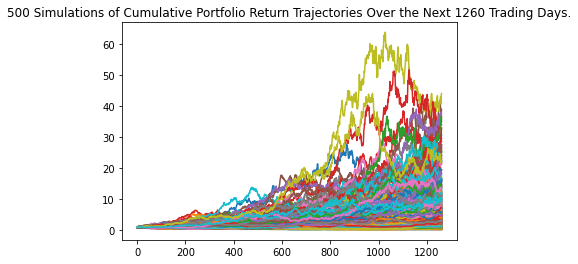

In [8]:
# Plot simulation outcomes
line_plot = MC_fiveryear.plot_simulation()

line_plot.get_figure().savefig('GM_TSLA_sim.png', bbox_inches='tight')

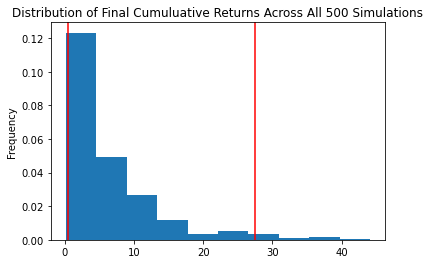

In [9]:
# Plot probability distribution and confidence intervals
dist = MC_fiveryear.plot_distribution()

dist.get_figure().savefig('GM_TSLA_dist.png', bbox_inches='tight')

In [10]:
# Fetch summary statistics from the Monte Carlo simulation results
summary = MC_fiveryear.summarize_cumulative_return()

# Print summary statistics
print(summary)

count           500.000000
mean              6.570491
std               7.027528
min               0.144370
25%               2.131024
50%               4.055120
75%               8.531331
max              44.125326
95% CI Lower      0.477593
95% CI Upper     27.522370
Name: 1260, dtype: float64


### Determine Upper and Lower Confidence Intervals

In [11]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments stocks
lower_ci = round(summary[8] * 15000,2)
upper_ci = round(summary[9] * 15000, 2)

# Print results
print(f"$15,000 invested in a GM and TSLA portfolio over five years could amount to \n"
      f"somewhere between ${lower_ci} and ${upper_ci}")

$15,000 invested in a GM and TSLA portfolio over five years could amount to 
somewhere between $7163.89 and $412835.55


### Simulate five year portfolio growth with 60% AT&T stock:

### Configure the Instance of `MCSimulation`

In [12]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
ticker = ['T']

tf = '1D'

sd = pd.Timestamp('2015-5-6', tz='America/New_York').isoformat()
ed = pd.Timestamp('2021-5-5', tz='America/New_York').isoformat()

MC_att_df = api.get_barset(ticker, timeframe=tf, start=sd, end=ed, limit=1000).df

MC_att_df.head()

T                               
                            open   high    low  close    volume
time                                                           
2017-05-16 00:00:00-04:00  38.68  38.76  38.19  38.19  17363647
2017-05-17 00:00:00-04:00  37.98  38.04  37.45  37.47  25230143
2017-05-18 00:00:00-04:00  37.51  38.14  37.46  37.96  21195561
2017-05-19 00:00:00-04:00  38.04  38.29  37.89  38.23  16178883
2017-05-22 00:00:00-04:00  38.26  38.35  38.17  38.24  12068958

In [13]:
# Print the simulation input data
MC_att_sixyear = MCSimulation(portfolio_data=MC_att_df, weights=[1], num_simulation=500, num_trading_days=252*6)

MC_att_sixyear.portfolio_data.head()

T                                            
                            open   high    low  close    volume daily_return
time                                                                        
2017-05-16 00:00:00-04:00  38.68  38.76  38.19  38.19  17363647          NaN
2017-05-17 00:00:00-04:00  37.98  38.04  37.45  37.47  25230143    -0.018853
2017-05-18 00:00:00-04:00  37.51  38.14  37.46  37.96  21195561     0.013077
2017-05-19 00:00:00-04:00  38.04  38.29  37.89  38.23  16178883     0.007113
2017-05-22 00:00:00-04:00  38.26  38.35  38.17  38.24  12068958     0.000262

### Run the Monte Carlo Simulation

In [14]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% AT&T stock
MC_att_sixyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.979498,0.996721,0.986143,1.034824,1.011251,0.995872,1.025032,0.988710,1.033142,1.006731,...,0.988487,1.003440,0.977490,1.012607,0.965745,0.988783,1.035384,0.983671,1.003172,1.011028
2,0.977728,0.988211,0.975619,1.005093,1.010844,0.982077,1.023491,0.945415,1.021857,1.015454,...,0.981091,1.000019,0.981133,1.010214,0.950271,0.986301,1.011970,0.992806,1.017149,0.989123
3,1.001984,1.005264,0.979911,0.989222,1.030730,0.978310,1.047114,0.960955,1.014880,1.031719,...,0.995806,0.981040,0.978378,0.997972,0.936091,0.970131,1.015414,0.988662,0.988241,1.000680
4,0.999756,1.019969,0.982497,0.997959,1.013710,0.964249,1.040163,0.947165,1.009750,1.051686,...,0.993516,0.980864,0.963961,1.001318,0.947466,0.958622,1.027452,0.984136,0.971607,1.011540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,0.299068,0.312023,0.573347,0.339318,1.314403,2.338838,1.163878,0.388471,0.569200,1.942214,...,0.993952,0.199895,0.284066,0.547888,2.454055,2.505049,1.449790,2.127016,0.126609,0.988129
1509,0.296063,0.321420,0.564569,0.340037,1.315789,2.300483,1.189859,0.376383,0.555995,1.917407,...,0.987239,0.201893,0.279077,0.545391,2.455728,2.533054,1.432397,2.121206,0.128140,0.980405
1510,0.293253,0.316921,0.561411,0.332764,1.337036,2.305539,1.194326,0.372596,0.563241,1.934692,...,0.995166,0.198164,0.272084,0.560536,2.415872,2.569395,1.453361,2.130174,0.126712,0.993969
1511,0.298974,0.314266,0.552548,0.329012,1.358360,2.345890,1.198614,0.372423,0.555819,1.930874,...,1.011303,0.202843,0.277261,0.556752,2.383843,2.576928,1.462415,2.114481,0.125202,0.967366


### Visualize the Results

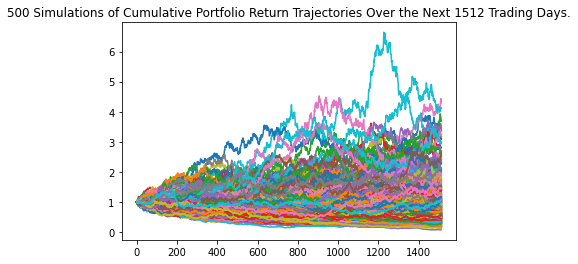

In [15]:
# Plot simulation outcomes
line = MC_att_sixyear.plot_simulation()

line.get_figure().savefig('AT&T_line_plot.png', bbox_inches='tight')

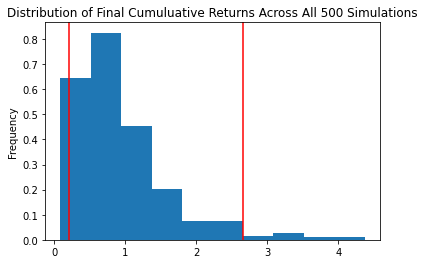

In [16]:
# Plot probability distribution and confidence intervals
dis = MC_att_sixyear.plot_distribution()
dis.get_figure().savefig('AT&T_distribution.png', bbox_inches='tight')

In [17]:
# Fetch summary statistics from the Monte Carlo simulation results
sum_atnt = MC_att_sixyear.summarize_cumulative_return()

# Print summary statistics
print(sum_atnt)

count           500.000000
mean              0.927444
std               0.658035
min               0.084044
25%               0.494646
50%               0.738014
75%               1.131165
max               4.370933
95% CI Lower      0.202175
95% CI Upper      2.650008
Name: 1512, dtype: float64


### Determine Upper and Lower Confidence Intervals

In [18]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
lower_ci_atnt = round(sum_atnt[8] * 15000,2)
upper_ci_atnt = round(sum_atnt[9] * 15000, 2)

# Print results
print(f"$15,000 invested in AT&T over six years could amount to \n"
      f"somewhere between ${lower_ci_atnt} and ${upper_ci_atnt}")

$15,000 invested in AT&T over six years could amount to 
somewhere between $3032.63 and $39750.11


### Simulate five year portfolio growth with 60% Nike stock:

### Configure the Instance of `MCSimulation`

In [19]:
nke_uaa_ticker = ['NKE', 'UAA']

timeframe_nke_uaa = '1D'

start_date_nke_uaa = pd.Timestamp('2015-5-6', tz='America/New_York').isoformat()
end_date_nke_uaa = pd.Timestamp('2021-5-6', tz='America/New_York').isoformat()

nke_uaa_df = api.get_barset(nke_uaa_ticker, timeframe=timeframe_nke_uaa, start=start_date_nke_uaa, end=end_date_nke_uaa, limit=1000).df

nke_uaa_df.head()

NKE                                    UAA  \
                            open    high    low  close    volume   open   
time                                                                      
2017-05-17 00:00:00-04:00  52.39  52.870  51.84  51.88  15935519  19.36   
2017-05-18 00:00:00-04:00  51.97  52.080  51.30  51.66  21076306  19.00   
2017-05-19 00:00:00-04:00  51.00  52.110  50.81  51.77  17881941  18.69   
2017-05-22 00:00:00-04:00  51.80  51.960  51.40  51.59  12269507  19.10   
2017-05-23 00:00:00-04:00  51.98  52.625  51.88  52.20  10004374  19.27   

                                                          
                            high     low  close   volume  
time                                                      
2017-05-17 00:00:00-04:00  19.41  18.900  18.95  5351811  
2017-05-18 00:00:00-04:00  19.13  18.730  18.89  2994948  
2017-05-19 00:00:00-04:00  19.19  18.345  19.09  5120948  
2017-05-22 00:00:00-04:00  19.47  19.020  19.28  2464142  
2017-05-23 00:00:00-04:00  19.54  19.250  19.50  2394474

In [20]:
# Configure a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nke_uaa = MCSimulation(portfolio_data=nke_uaa_df, weights=[0.6, 0.4], num_simulation=500, num_trading_days=252*6)

# Printing the simulation input data
MC_nke_uaa.portfolio_data.head()

NKE                                               \
                            open    high    low  close    volume daily_return   
time                                                                            
2017-05-17 00:00:00-04:00  52.39  52.870  51.84  51.88  15935519          NaN   
2017-05-18 00:00:00-04:00  51.97  52.080  51.30  51.66  21076306    -0.004241   
2017-05-19 00:00:00-04:00  51.00  52.110  50.81  51.77  17881941     0.002129   
2017-05-22 00:00:00-04:00  51.80  51.960  51.40  51.59  12269507    -0.003477   
2017-05-23 00:00:00-04:00  51.98  52.625  51.88  52.20  10004374     0.011824   

                             UAA                                              
                            open   high     low  close   volume daily_return  
time                                                                          
2017-05-17 00:00:00-04:00  19.36  19.41  18.900  18.95  5351811          NaN  
2017-05-18 00:00:00-04:00  19.00  19.13  18.730  18.89  2994948    -0.003166  
2017-05-19 00:00:00-04:00  18.69  19.19  18.345  19.09  5120948     0.010588  
2017-05-22 00:00:00-04:00  19.10  19.47  19.020  19.28  2464142     0.009953  
2017-05-23 00:00:00-04:00  19.27  19.54  19.250  19.50  2394474     0.011411

### Run the Monte Carlo Simulation

In [21]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Nike stock
MC_nke_uaa.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990388,1.037288,1.005437,1.028309,1.013924,1.001793,0.975014,1.012950,1.024348,1.008521,...,1.002282,1.010608,0.993290,0.997650,0.983270,0.986119,0.988634,0.986275,0.989702,0.983861
2,0.992237,1.033697,1.033500,1.030115,1.026757,0.989207,0.992366,1.013960,1.049602,1.010700,...,1.015341,1.014394,1.022484,1.004686,0.961132,0.977285,0.991037,1.011914,0.971113,0.991939
3,0.989038,1.059261,1.030677,1.047527,1.009067,1.019772,0.998419,1.012709,1.073074,1.008668,...,1.027671,0.977521,0.996208,0.977390,0.970741,0.957822,1.023411,0.994039,0.936181,0.985863
4,1.016840,1.072172,1.018812,1.031225,1.018213,1.040461,0.996248,1.016368,1.038662,1.002625,...,1.041468,0.955121,1.010777,0.988892,0.922951,0.962576,1.040002,0.967939,0.921834,0.974030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,4.681072,3.337408,7.994140,11.069107,2.046794,4.287981,0.979327,8.488419,5.657951,2.026380,...,4.840331,3.233416,4.295357,3.681186,1.503519,2.767542,2.026927,3.693759,1.516250,1.682488
1509,4.785847,3.318211,8.052584,11.152675,2.014548,4.233726,0.992620,8.670401,5.587104,2.027771,...,4.773367,3.274671,4.341304,3.730962,1.465550,2.829752,2.004893,3.733915,1.529944,1.695623
1510,4.844360,3.321607,7.832984,10.909228,2.001872,4.290322,0.996704,8.735041,5.693669,2.012360,...,4.645800,3.253520,4.393868,3.797381,1.468640,2.720921,2.027737,3.821877,1.526963,1.667398
1511,4.883942,3.296410,7.714054,10.987670,1.990367,4.233487,0.965831,8.813308,5.612773,1.986271,...,4.646095,3.260170,4.463683,3.841069,1.452949,2.781430,1.996446,3.808533,1.580238,1.652305


### Visualize the Results

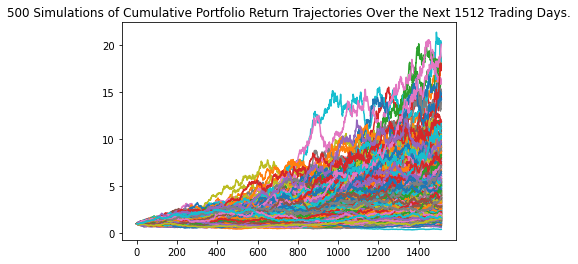

In [22]:
# Plot simulation outcomes
line_plot_nke_uaa = MC_nke_uaa.plot_simulation()

line_plot_nke_uaa.get_figure().savefig('NKE_UAA_sim.png', bbox_inches='tight')

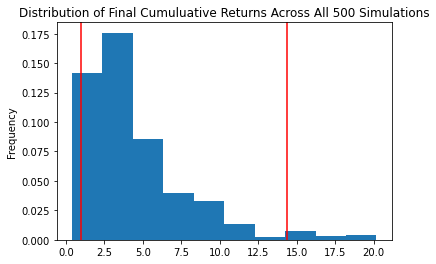

In [23]:
# Plot probability distribution and confidence intervals
dist_plot_nke_uaa = MC_nke_uaa.plot_distribution()

dist_plot_nke_uaa.get_figure().savefig('NKE_UAA_dist.png', bbox_inches='tight')

In [24]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_nke_uaa = MC_nke_uaa.summarize_cumulative_return()

# Print summary statistics
print(summary_nke_uaa)

count           500.000000
mean              4.476601
std               3.288101
min               0.391031
25%               2.197863
50%               3.555171
75%               5.534866
max              20.180223
95% CI Lower      0.985540
95% CI Upper     14.339435
Name: 1512, dtype: float64


### Determine Upper and Lower Confidence Intervals

In [25]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
lower_ci_nke_uaa = round(summary_nke_uaa[8] * 15000,2)
upper_ci_nke_uaa = round(summary_nke_uaa[9] * 15000, 2)

# Print results
print(f"$15,000 invested in NKE and UAA over six years could amount to \n"
      f"somewhere between ${lower_ci_nke_uaa} and ${upper_ci_nke_uaa}.")

$15,000 invested in NKE and UAA over six years could amount to 
somewhere between $14783.1 and $215091.52.


### Simulate five year portfolio growth with 60% Exxon stock:

### Configure the Instance of `MCSimulation`

In [26]:
xom_tickers = ['XOM', 'NKE', 'TSLA', 'MSFT']

xom_tf = '1D'

xom_start_date = pd.Timestamp('2015-1-1', tz='America/New_York').isoformat()
xom_end_date = pd.Timestamp('2021-1-1', tz='America/New_York').isoformat()

xom_df = api.get_barset(xom_tickers, timeframe=xom_tf, start=xom_start_date, end=xom_end_date, limit=1000).df

xom_df.head()

MSFT                                      NKE  \
                            open    high     low   close    volume   open   
time                                                                        
2017-01-12 00:00:00-05:00  63.09  63.400  61.950  62.610  17995223  52.52   
2017-01-13 00:00:00-05:00  62.62  62.865  62.350  62.685  14606611  52.59   
2017-01-17 00:00:00-05:00  62.67  62.700  62.030  62.520  14749095  53.40   
2017-01-18 00:00:00-05:00  62.67  62.700  62.120  62.490  13431945  53.86   
2017-01-19 00:00:00-05:00  62.31  62.980  62.195  62.290  14868654  53.84   

                                                             TSLA          \
                            high    low    close   volume    open    high   
time                                                                        
2017-01-12 00:00:00-05:00  52.69  52.16  52.3999  6398237  229.06  230.70   
2017-01-13 00:00:00-05:00  52.93  52.23  52.9200  5798351  230.00  237.85   
2017-01-17 00:00:00-05:00  53.95  53.01  53.6400  8376184  236.70  239.96   
2017-01-18 00:00:00-05:00  53.89  52.86  53.2600  5792457  236.65  239.71   
2017-01-19 00:00:00-05:00  53.94  52.89  52.9300  6759618  247.25  248.68   

                                                      XOM                \
                              low   close   volume   open   high    low   
time                                                                      
2017-01-12 00:00:00-05:00  225.58  229.58  3144888  87.27  87.38  86.07   
2017-01-13 00:00:00-05:00  229.59  237.75  5291841  86.27  86.68  86.17   
2017-01-17 00:00:00-05:00  234.37  235.75  3910024  86.56  87.39  86.25   
2017-01-18 00:00:00-05:00  235.58  238.35  3183542  87.06  87.41  86.05   
2017-01-19 00:00:00-05:00  240.75  243.76  6440125  85.97  86.10  84.59   

                                            
                           close    volume  
time                                        
2017-01-12 00:00:00-05:00  86.34   8412108  
2017-01-13 00:00:00-05:00  86.35   6361989  
2017-01-17 00:00:00-05:00  87.35  10053302  
2017-01-18 00:00:00-05:00  86.28   8452951  
2017-01-19 00:00:00-05:00  84.71  12845125

In [27]:
# Configuring a Monte Carlo simulation to forecast five years cumulative returns
xom_MC = MCSimulation(portfolio_data=xom_df, weights=[0.25, 0.25, 0.25, 0.25], num_simulation=500, num_trading_days=252*6)

# Printing the simulation input data
xom_MC.portfolio_data.head()

MSFT                                    \
                            open    high     low   close    volume   
time                                                                 
2017-01-12 00:00:00-05:00  63.09  63.400  61.950  62.610  17995223   
2017-01-13 00:00:00-05:00  62.62  62.865  62.350  62.685  14606611   
2017-01-17 00:00:00-05:00  62.67  62.700  62.030  62.520  14749095   
2017-01-18 00:00:00-05:00  62.67  62.700  62.120  62.490  13431945   
2017-01-19 00:00:00-05:00  62.31  62.980  62.195  62.290  14868654   

                                          NKE                         ...  \
                          daily_return   open   high    low    close  ...   
time                                                                  ...   
2017-01-12 00:00:00-05:00          NaN  52.52  52.69  52.16  52.3999  ...   
2017-01-13 00:00:00-05:00     0.001198  52.59  52.93  52.23  52.9200  ...   
2017-01-17 00:00:00-05:00    -0.002632  53.40  53.95  53.01  53.6400  ...   
2017-01-18 00:00:00-05:00    -0.000480  53.86  53.89  52.86  53.2600  ...   
2017-01-19 00:00:00-05:00    -0.003201  53.84  53.94  52.89  52.9300  ...   

                             TSLA                                  XOM         \
                              low   close   volume daily_return   open   high   
time                                                                            
2017-01-12 00:00:00-05:00  225.58  229.58  3144888          NaN  87.27  87.38   
2017-01-13 00:00:00-05:00  229.59  237.75  5291841     0.035587  86.27  86.68   
2017-01-17 00:00:00-05:00  234.37  235.75  3910024    -0.008412  86.56  87.39   
2017-01-18 00:00:00-05:00  235.58  238.35  3183542     0.011029  87.06  87.41   
2017-01-19 00:00:00-05:00  240.75  243.76  6440125     0.022698  85.97  86.10   

                                                                
                             low  close    volume daily_return  
time                                                            
2017-01-12 00:00:00-05:00  86.07  86.34   8412108          NaN  
2017-01-13 00:00:00-05:00  86.17  86.35   6361989     0.000116  
2017-01-17 00:00:00-05:00  86.25  87.35  10053302     0.011581  
2017-01-18 00:00:00-05:00  86.05  86.28   8452951    -0.012250  
2017-01-19 00:00:00-05:00  84.59  84.71  12845125    -0.018197  

[5 rows x 24 columns]

### Run the Monte Carlo Simulation

In [28]:
# Run a Monte Carlo simulation to forecast five years cumulative returns with 60% Exxon stock
xom_MC.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993055,0.987063,1.001161,0.997171,1.009058,1.015335,0.999349,0.993823,0.990675,0.986617,...,1.026341,0.994874,0.995927,1.028976,1.005160,0.990781,0.999074,1.004384,0.990810,0.976194
2,0.969490,0.986473,1.022800,1.004613,1.021398,1.030794,1.018821,0.987983,0.977574,0.993115,...,1.029234,0.976073,1.006187,1.029161,1.008853,0.985019,0.981085,1.017801,0.974191,0.977929
3,0.968566,0.979574,1.018774,1.007735,1.038541,1.032530,1.006921,1.007168,0.988229,0.988843,...,1.037343,0.987166,1.030807,1.039575,0.979194,0.987240,0.969280,1.007495,0.959863,0.988449
4,0.943458,0.972590,1.009596,0.998993,1.029604,1.035927,1.017705,1.014754,0.991127,1.006263,...,1.029902,0.975412,1.022360,1.051986,1.002806,0.985941,0.952359,1.032460,0.937062,0.972251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,6.802984,3.636786,3.238761,4.166712,5.285656,5.040042,3.680098,7.121749,5.916593,5.440615,...,4.285595,11.372758,7.720275,4.007326,3.082365,3.176360,4.316913,4.941519,4.613089,10.731733
1509,6.763300,3.652715,3.224991,4.195089,5.294674,5.269808,3.648372,7.175613,5.996141,5.501556,...,4.265934,11.430023,7.712376,3.994540,3.082251,3.178729,4.403984,4.825594,4.657920,10.640482
1510,6.835010,3.605772,3.255836,4.328014,5.213496,5.216612,3.641920,7.291292,5.961904,5.456922,...,4.245820,11.358470,7.481086,4.067218,3.079638,3.148814,4.299440,4.885616,4.653246,10.780440
1511,6.849360,3.610087,3.245058,4.310995,5.213089,5.296181,3.650283,7.308161,5.866993,5.564360,...,4.266568,11.544450,7.370563,4.053372,3.041249,3.136792,4.266036,4.837243,4.651058,10.799559


### Visualize the Results

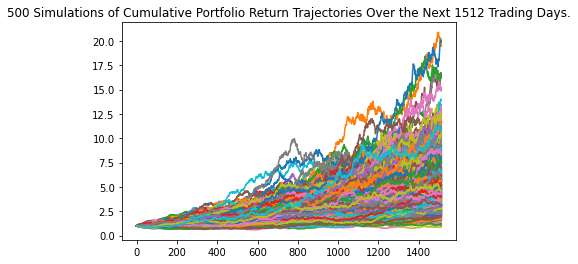

In [29]:
# Plot simulation outcomes
xom_line = xom_MC.plot_simulation()

xom_line.get_figure().savefig('Xom_sim.png', bbox_inches='tight')

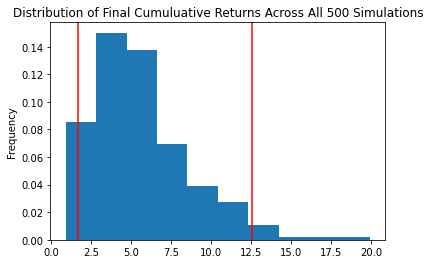

In [30]:
# Plot probability distribution and confidence intervals
xom_dist = xom_MC.plot_distribution()

xom_dist.get_figure().savefig('Xom_dist.png', bbox_inches='tight')

In [31]:
# Fetch summary statistics from the Monte Carlo simulation results
xom_summary = xom_MC.summarize_cumulative_return()

# Print summary statistics
print(xom_summary)

count           500.000000
mean              5.607927
std               3.017575
min               0.890757
25%               3.373128
50%               4.940650
75%               6.965326
max              19.933639
95% CI Lower      1.674684
95% CI Upper     12.546328
Name: 1512, dtype: float64


### Determine Upper and Lower Confidence Intervals

In [32]:
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $15,000 investments
xom_lower_ci = round(xom_summary[8] * 15000,2)
xom_upper_ci = round(xom_summary[9] * 15000, 2)

# Print results
print(f"$15,000 invested in 'XOM', 'NKE', 'TSLA', and 'MSFT' over six years could amount to \n"
      f"somewhere between ${xom_lower_ci} and ${xom_upper_ci}.")

$15,000 invested in 'XOM', 'NKE', 'TSLA', and 'MSFT' over six years could amount to 
somewhere between $25120.26 and $188194.92.


### Summarize findings across all 4 simulations

- 15,000 invested in a GM and TSLA portfolio over five years could amount to somewhere between 9112.93 and 390983.41

- 15,000 invested in AT&T over six years could amount to somewhere between 3032.63 and 39750.11

- 15,000 invested in NKE and UAA over six years could amount to somewhere between 14783.1 and 215091.52.

- 15,000 invested in 'XOM', 'NKE', 'TSLA', and 'MSFT' over six years could amount to somewhere between 25120.26 and 188194.92.